# Predicting AMAZON-Stocks using LSTM 

### Step-01 :- Load the Time Series data (AMAZON stocks)

In [3]:
import pandas as pd
import numpy as np

import warnings 
warnings.filterwarnings("ignore")

df = pd.read_csv("AMAZON_2006_to_2018_stocks.csv")
df.head()

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,47.47,47.85,46.25,47.58,7582127,AMZN
1,2006-01-04,47.48,47.73,46.69,47.25,7440914,AMZN
2,2006-01-05,47.16,48.20,47.11,47.65,5417258,AMZN
3,2006-01-06,47.97,48.58,47.32,47.87,6154285,AMZN
4,2006-01-09,46.55,47.10,46.40,47.08,8945056,AMZN


In [4]:
df.shape

(3019, 7)

### Step-02 :- Identify and Seperate the Target and Input features

In [6]:
# we have to predict "Close" stocks value
data = df["Close"].values

### Step-03 :- Preprocessing 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3019 entries, 0 to 3018
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3019 non-null   object 
 1   Open    3019 non-null   float64
 2   High    3019 non-null   float64
 3   Low     3019 non-null   float64
 4   Close   3019 non-null   float64
 5   Volume  3019 non-null   int64  
 6   Name    3019 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 165.2+ KB


In [9]:
# Convert "Date" column into 'datetime' and sort them
df["Date"] = pd.DatetimeIndex(df["Date"])
df = df.sort_values(by="Date")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3019 entries, 0 to 3018
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3019 non-null   datetime64[ns]
 1   Open    3019 non-null   float64       
 2   High    3019 non-null   float64       
 3   Low     3019 non-null   float64       
 4   Close   3019 non-null   float64       
 5   Volume  3019 non-null   int64         
 6   Name    3019 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 165.2+ KB


In [10]:
# Train-Test Split
years_for_train = range(2006,2017)
years_for_test = [2017, 2018]

train_data = data[df["Date"].dt.year.isin(years_for_train)]

test_data = data[df["Date"].dt.year.isin(years_for_test)]

print(train_data.shape)
print(test_data.shape)

(2768,)
(251,)


In [11]:
def create_sequences(dataset, time_steps):
    X= []
    y= []
    for i in range(len(dataset)-time_steps):
        X.append(dataset[i: i+time_steps])
        y.append(dataset[i+time_steps])
    return np.array(X), np.array(y)

# size of the Input Sequence
time_steps = 50
X_train, y_train = create_sequences(train_data, time_steps)
X_test, y_test = create_sequences(test_data, time_steps)


In [12]:
# Normalizing data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

y_train = scaler.fit_transform(y_train.reshape(-1,1))
y_test = scaler.transform(y_test.reshape(-1,1))


# change the shape of Sequences for passing them further to LSTM 
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2718, 50, 1) (2718, 1)
(201, 50, 1) (201, 1)


In [13]:
X_train[0]

array([[-0.96090106],
       [-0.96262181],
       [-0.96045391],
       [-0.95917016],
       [-0.96322293],
       [-0.97068291],
       [-0.97442026],
       [-0.97752138],
       [-0.97738064],
       [-0.97955881],
       [-0.97804688],
       [-0.97752641],
       [-0.98048493],
       [-0.98157402],
       [-0.98016263],
       [-0.98249316],
       [-0.97714718],
       [-0.97461584],
       [-0.97628251],
       [-0.97726047],
       [-0.98184035],
       [-0.9884463 ],
       [-1.01134475],
       [-1.01342982],
       [-1.0157527 ],
       [-1.01255681],
       [-1.0136186 ],
       [-1.01109684],
       [-1.01467461],
       [-1.01293034],
       [-1.00805213],
       [-1.00889601],
       [-1.00892035],
       [-1.01370649],
       [-1.01172039],
       [-1.01608668],
       [-1.01401468],
       [-1.01597136],
       [-1.01904469],
       [-1.02087267],
       [-1.02232244],
       [-1.02091284],
       [-1.02290279],
       [-1.02276599],
       [-1.02358791],
       [-1

In [14]:
y_train[0]

array([-1.02528173])

### Step-04 :- LSTM model building and evaluation

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(time_steps,1)),
    LSTM(50, return_sequences=False),
    Dense(1)
])

model.compile(optimizer="adam", loss="mean_squared_error")

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 50, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# training the 
model_history = model.fit(X_train, y_train, epochs=5, batch_size=16, validation_data=(X_test,y_test))

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 0.0772 - val_loss: 0.2906
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0043 - val_loss: 0.1431
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0044 - val_loss: 0.0908
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0049 - val_loss: 0.0980
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0038 - val_loss: 0.0678


In [18]:
model_history.history["val_loss"]

[0.290583074092865,
 0.14313805103302002,
 0.09081226587295532,
 0.09803027659654617,
 0.06781940907239914]

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


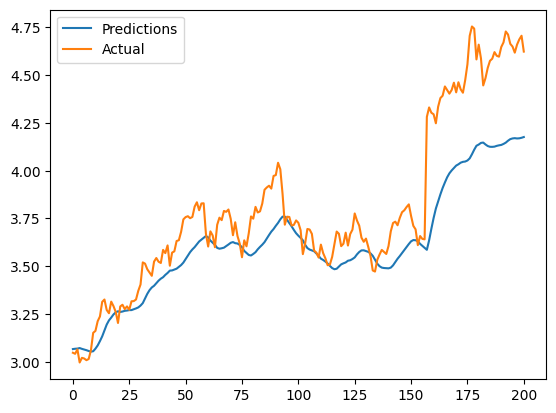

In [19]:
# Compare Actual and Predictions
y_pred = model.predict(X_test)

import matplotlib.pyplot as plt
plt.plot(y_pred, label= "Predictions")
plt.plot(y_test, label="Actual")
plt.legend()
plt.show()

In [20]:
results = model.evaluate(X_test, y_test)
print(results)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0348 
0.06781940907239914


In [40]:
# Let's pick the last 50 days from the test set as input
# and predict the next day's stock price

# Get the last 50 actual "Close" prices from test_data
last_50_days = test_data[-time_steps:]

# Scale it using the same scaler used for training
last_50_days_scaled = scaler.transform(last_50_days.reshape(-1, 1))

# Reshape to (1, time_steps, 1) as required by LSTM input
X_input = last_50_days_scaled.reshape(1, time_steps, 1)

# Predict the next day's price
predicted_scaled_price = model.predict(X_input)

# Inverse transform to get actual price
predicted_price = scaler.inverse_transform(predicted_scaled_price)

# Print the predicted price
print(f"Predicted next day's Amazon stock price: ${predicted_price[0][0]:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted next day's Amazon stock price: $1076.16
